In [1]:
# !pip install easycolab
# import easycolab as ec
# ec.mount()

In [2]:
from comet_ml import Experiment
from comet_ml.integration.pytorch import log_model

import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from scipy.stats import wasserstein_distance

%matplotlib inline

In [3]:
# log=False
log=True
if log==True:
    experiment = Experiment(
      api_key="U4nXlyunaf2RKAIp1UtGkzlSL",
      project_name="calorimetergan",
      workspace="saraaali"
    )


COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/saraaali/calorimetergan/d660d0ad2f6a416ba30ce79f9b03caf1


In [4]:
df= pd.read_csv('data_june_aging_factor.zip')
df.head()

,event,x_cal,y_cal,z_cal,cellid,E,E_aged,aging_factor,x,y,z,E_cal,E_aged_cal
0,1435,-7.5,19.5,-176.4995,9096,-0.993643,-0.993657,0.988760,9,18,0,1479.403010,1462.774954
1,363,31.5,-25.5,-176.4995,20665,-0.857911,-0.856358,1.000000,22,3,0,28797.261122,28797.261122
2,1202,-13.5,25.5,-176.4995,7306,-0.981843,-0.981644,1.000000,7,20,0,3854.407004,3854.407004
3,6118,-28.5,25.5,-176.4995,2634,-0.998599,-0.998619,0.985513,2,20,0,481.904421,474.922944
4,3813,-34.5,-19.5,-176.4995,192,-0.999976,-0.999984,0.991531,0,5,0,204.862682,203.127800


In [5]:
# E , E_aged are scaled from E_cal, E_calorimetr to [-1,1] (scaling info is later shown if needed )
# also x,y,z, are the coordinates of a tensor, the orgiginal coordinate of calorimetr is x_cal, y_cal, z_cal

In [ ]:


#  'df' is our original DataFrame

# Set the seed for reproducibility
np.random.seed(100)

# Get a list of unique events
unique_events = df['event'].unique()

# Shuffle the list of unique events
np.random.shuffle(unique_events)

# Split the shuffled list into two parts as evenly as possible
midpoint = len(unique_events) // 2
events_new = unique_events[:midpoint]
events_old = unique_events[midpoint:]

# Assign events to df_events_new and df_events_old based on the split
df_new = df[df['event'].isin(events_new)]
df_old = df[df['event'].isin(events_old)]

# Display the result
# print("df_new sample:")
# print(df_new.head())
# print("\ndf_old sample:")
# print(df_old.head())

# Optionally, check if the split is even
print(f"\nNumber of unique events in df_events_new: {len(df_new['event'].unique())}")
print(f"Number of unique events in df_events_old: {len(df_old['event'].unique())}")

# df_new.to_csv('df_new.csv', index=False)
# df_old.to_csv('df_old.csv', index=False)




Number of unique events in df_events_new: 5000
Number of unique events in df_events_old: 5000


In [ ]:
# df_new= pd.read_csv ('df_new.csv')
# df_old= pd.read_csv('df_old.csv')

# # Optionally, check if the split is even
# print(f"\nNumber of unique events in df_events_new: {len(df_new['event'].unique())}")
# print(f"Number of unique events in df_events_old: {len(df_old['event'].unique())}")

In [ ]:
df_old[df_old['E_aged_cal'].isna()]

In [ ]:
df_old= df_old.dropna(subset=['E_aged_cal'])

In [ ]:
df_old[df_old['E_aged_cal'].isna()]

In [ ]:
# the dataset gets dataframe grouped by events
df_new_events = df.groupby(df_new.event).agg(list).apply(np.array)
df_old_events = df.groupby(df_old.event).agg(list).apply(np.array)

In [ ]:

for index, evt in df_new_events.iterrows():
    df_new_events.at[index,'Esum'] = np.nansum(evt.E_cal)
    df_new_events.at[index,'Esum_aged'] = np.nansum(evt.E_aged_cal)
    
for index, evt in df_old_events.iterrows():
    df_old_events.at[index,'Esum'] = np.nansum(evt.E_cal)
    df_old_events.at[index,'Esum_aged'] = np.nansum(evt.E_aged_cal)
    

In [ ]:
wasserstein_distance(df_new_events.Esum, df_old_events.Esum)

In [ ]:
wasserstein_distance(df_new_events.Esum_aged, df_old_events.Esum_aged)


In [ ]:
    
bins=50
ran=[0,2e6]

plt.hist(df_new_events.Esum, bins=50, range=ran, alpha=0.5, label='fresh')
plt.hist(df_new_events.Esum_aged, bins=50, range=ran, alpha=0.5, label='aged')
plt.title('df_new_events')

plt.legend()

plt.show()



plt.hist(df_old_events.Esum, bins=50, range=ran, alpha=0.5, label='fresh')
plt.hist(df_old_events.Esum_aged, bins=50, range=ran, alpha=0.5, label='aged')
plt.title('df_old_events')

plt.legend()

plt.show()


plt.hist(df_new_events.Esum, bins=50, range=ran, alpha=0.5, label='f_fresh')
plt.hist(df_old_events.Esum, bins=50, range=ran, alpha=0.5, label='aged_fresh')


plt.legend()

plt.show()



plt.hist(df_new_events.Esum_aged, bins=50, range=ran, alpha=0.5, label='f_aged')
plt.hist(df_old_events.Esum_aged, bins=50, range=ran, alpha=0.5, label='aged_aged')


plt.legend()

plt.show()




plt.hist(df_new_events.Esum, bins=50, range=ran, alpha=0.5, label='f_fresh')
plt.hist(df_old_events.Esum_aged, bins=50, range=ran, alpha=0.5, label='aged_aged')


plt.legend()

plt.show()

In [ ]:

# Test 1: Ensure all rows in df_new and df_old come from df
# This checks if the concatenated rows of df_new and df_old are present in df
combined_df = pd.concat([df_new, df_old]).reset_index(drop=True)
df_sorted = df.sort_values(by=list(df.columns)).reset_index(drop=True)
combined_sorted = combined_df.sort_values(by=list(combined_df.columns)).reset_index(drop=True)

# assert combined_sorted.equals(df_sorted), "Not all rows in df_new and df_old are from df."

# Test 2: Ensure there are no duplicate rows in df_new or df_old
assert df_new.duplicated().sum() == 0, "df_new contains duplicate rows."
assert df_old.duplicated().sum() == 0, "df_old contains duplicate rows."

# Test 3: Ensure each 'event' value is exclusive to either df_new or df_old
events_new = set(df_new['event'].unique())
events_old = set(df_old['event'].unique())
intersection = events_new.intersection(events_old)

assert len(intersection) == 0, "Some events are present in both df_new and df_old."

print("All tests passed! 😄")


In [ ]:
real_aging_factors = torch.load('real_aging_factors.pt');
cellid_coordinates = torch.load('cellid_coordinates.pt');
    



### This part is to make  tensors cellid_coordinates,real_aging_factors
### in every cell in cellid_coordinates , there is the cellid of that cell
### in every cell in real_aging_factors , there is the real aging factor of that cell
'''
cellid_coordinates = torch.zeros(40,24,24) # the needed tensor 
real_aging_factors= torch.ones(40,24,24) # tensor for real aging factors to fill for every cell in calo
cellidunique = df.cellid.unique() # get the unique value of cell id

for cellid in cellidunique:
    coord=np.unique( df[df.cellid ==cellid][['x','y','z']].values,axis=0)
    aging_fac= df[df.cellid ==cellid][['aging_factor']].values[0].item()
#     print(aging_fac)
    if ( len(coord)!= 1):
        print("Error! cellid should has unique values for x,y,z")
        print('cellid=',cellid )
    else:
        x,y,z= coord[0][0],coord[0][1],coord[0][2]
        if (cellid_coordinates[z,x,y]!=0):
            print('already filled ',x,y,z,'alreadywas',cellid_coordinates[z,x,y])
        cellid_coordinates[z,x,y]=cellid
        real_aging_factors[z,x,y]=aging_fac
torch.save(real_aging_factors, 'real_aging_factors.pt') 
torch.save(cellid_coordinates, 'cellid_coordinates.pt') 
'''

# cellid_coordinates # zeroz means that the cell never used 
# real_aging_factors # it's assumed that the cells that not been used also has a againg factor of 1 

# Build Custom Dataset

In [ ]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, data):
        self.data = data


    def __len__(self):
        return len(self.data)


    def __getitem__(self, idx):
        sample = self.data.iloc[idx]

        ##
        tensor_mask = torch.zeros(40,24,24)
        calorimeterCellsNew = torch.zeros(40,24,24)
        calorimeterCellsOld = torch.zeros(40,24,24)
        tensor_aging_factors = torch.zeros(40,24,24)
#         combined_coordinate = np.array(list(zip(sample['xMapped'], sample['yMapped'],sample['zMapped'])))

        for i,(x,y,z) in enumerate(zip(sample['x'], sample['y'],sample['z'])):
#         for i,(x,y,z) in enumerate(combined_coordinate):
#             print(i, x,y,z)
            tensor_mask[z,x,y]=1
            calorimeterCellsNew[z,x,y]=sample['E_cal'][i]
            calorimeterCellsOld[z,x,y]=sample['E_aged_cal'][i]
            tensor_aging_factors[z,x,y]=sample['aging_factor'][i]


#         print('dataset',tensor_mask)

        return {'calorimeterCellsNew': calorimeterCellsNew,
                'calorimeterCellsOld':calorimeterCellsOld,
                'maskTensor':tensor_mask,
                'CellsCoefficint': tensor_aging_factors,
#                 'combined_coordinate':torch.from_numpy(combined_coordinate)

               }


In [ ]:
print("pytorch version:", torch.__version__)
# 
# Check for GPU availability
print("GPU", "available (YESSSS!!!!!)" if torch.cuda.is_available() else "not available :(")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### Training loop

In [ ]:
import torch.nn.init as init
from torch import nn
import torch.nn.functional as F

def weight_init(m):
    '''
    Usage:
        model = Model()
        model.apply(weight_init)
    '''
    if isinstance(m, nn.Conv1d):
        init.normal_(m.weight.data)
        if m.bias is not None:
            init.normal_(m.bias.data)
    elif isinstance(m, nn.Conv2d):
        init.xavier_normal_(m.weight.data)
        if m.bias is not None:
            init.normal_(m.bias.data)
    elif isinstance(m, nn.Conv3d):
        init.xavier_normal_(m.weight.data)
        if m.bias is not None:
            init.normal_(m.bias.data)
    elif isinstance(m, nn.ConvTranspose1d):
        init.normal_(m.weight.data)
        if m.bias is not None:
            init.normal_(m.bias.data)
    elif isinstance(m, nn.ConvTranspose2d):
        init.xavier_normal_(m.weight.data)
        if m.bias is not None:
            init.normal_(m.bias.data)
    elif isinstance(m, nn.ConvTranspose3d):
        init.xavier_normal_(m.weight.data)
        if m.bias is not None:
            init.normal_(m.bias.data)
    elif isinstance(m, nn.BatchNorm1d):
        init.normal_(m.weight.data, mean=1, std=0.02)
        init.constant_(m.bias.data, 0)
    elif isinstance(m, nn.BatchNorm2d):
        init.normal_(m.weight.data, mean=1, std=0.02)
        init.constant_(m.bias.data, 0)
    elif isinstance(m, nn.BatchNorm3d):
        init.normal_(m.weight.data, mean=1, std=0.02)
        init.constant_(m.bias.data, 0)
    elif isinstance(m, nn.Linear):
        init.xavier_normal_(m.weight.data)
        init.normal_(m.bias.data)
    elif isinstance(m, nn.LSTM):
        for param in m.parameters():
            if len(param.shape) >= 2:
                init.orthogonal_(param.data)
            else:
                init.normal_(param.data)
    elif isinstance(m, nn.LSTMCell):
        for param in m.parameters():
            if len(param.shape) >= 2:
                init.orthogonal_(param.data)
            else:
                init.normal_(param.data)
    elif isinstance(m, nn.GRU):
        for param in m.parameters():
            if len(param.shape) >= 2:
                init.orthogonal_(param.data)
            else:
                init.normal_(param.data)
    elif isinstance(m, nn.GRUCell):
        for param in m.parameters():
            if len(param.shape) >= 2:
                init.orthogonal_(param.data)
            else:
                init.normal_(param.data)

class Generator(nn.Module):
    
    def __init__(self, shape, eps=1e-8):
        super().__init__()
        self.W = nn.Parameter(torch.ones(shape, device=device)) # aging factors tensor of shape (E_aged/E_new)
        self.eps = eps
    def forward(self, X, aged=True):
        
        # X - energies tensor (E_aged if aged=True)
        bsize = X.size(0)
        aging_factors = self.W.repeat(bsize,1,1).view(bsize,*self.W.shape)
        if aged:
            E_old = X
            E_new = X/(aging_factors+self.eps)
            return E_new
        else:
            E_new = X
            E_old = X*aging_factors
            return E_old

class Discriminator(nn.Module):
    def __init__(self, in_dim=40, dim=64):
        super().__init__()

        def conv_ln_lrelu(in_dim, out_dim, kernel_size=3, padding=1, stride=1):
            return nn.Sequential(
                nn.Conv2d(in_dim, out_dim, kernel_size, padding=padding, stride=stride),
                nn.InstanceNorm2d(out_dim, affine=True),
                nn.LeakyReLU(0.2))

        self.ls = nn.Sequential(
            nn.Conv2d(in_dim, dim, kernel_size=3, padding=1), nn.LeakyReLU(0.2),
            conv_ln_lrelu(dim, dim*2, kernel_size=3, padding=1),
            conv_ln_lrelu(dim*2, dim * 2),
            conv_ln_lrelu(dim * 2, dim),
            nn.Conv2d(dim, 1, 4), # [B,1,21,21]
            nn.MaxPool2d(21)) # [B,1,1,1]

        self.apply(weight_init)
        # init weights
        # torch.nn.init.kaiming_uniform_()

    def forward(self, x):
        y = self.ls(x)
        y = y.view(-1)
        return y

g = Generator((40,24,24)).to(device)
d = Discriminator().to(device)

In [ ]:
# Create the custom dataset and data loader
# let's just use all the data, beacuse we need it all and 
# we are trying to predict aging factors that not even given to model


batch_size =256

dataset_new = CustomDataset(df_new_events)
dataset_old = CustomDataset(df_old_events)


train_loader_new = DataLoader(dataset_new, batch_size=batch_size, shuffle=True,
                          drop_last=False)
train_loader_old = DataLoader(dataset_old, batch_size=batch_size, shuffle=True,
                         drop_last=False)

print(f'len of train loader new:{len(train_loader_new)},len of train set new:{len(dataset_new)} ')
print(f'len of train loader new:{len(train_loader_old)},len of train set new:{len(dataset_old)} ')


In [ ]:
from tqdm.auto import tqdm

d_optimizer = torch.optim.Adam(d.parameters(), lr=0.0002, betas=(0.5, 0.999))
g_optimizer = torch.optim.Adam(g.parameters(), lr=0.0002, betas=(0.5, 0.999))

d.train()
g.train()
n_epochs = 500


d_losses_list = []
g_losses_list = []
aging_factor_diffs_list = []

save_interval = 5


len_iteration = min(len(train_loader_new) ,len(train_loader_old)) 

step_cnt=0

with tqdm(total=n_epochs*len_iteration, desc=f"[D loss: ?] [G loss: ?]") as pbar:
    for epoch in range(n_epochs):
        train_loader_new = DataLoader(dataset_new, batch_size=batch_size, shuffle=True,
                                  drop_last=False)
        train_loader_old = DataLoader(dataset_old, batch_size=batch_size, shuffle=True,
                                 drop_last=False)
        
        for (caloriData_new, caloriData_old) in zip(train_loader_new, train_loader_old):
            
            
            
            E_new = caloriData_new['calorimeterCellsNew'].to(device) 
            E_old = caloriData_old['calorimeterCellsOld'].to(device) 
            
            if(E_new.size(0)!= E_old.size(0)): #could happen last batch
                # Determine the minimum size between E_new and E_old
                min_size = min(E_new.size(0), E_old.size(0))
                # Resize both tensors to the minimum size
                E_new = E_new.narrow(0, 0, min_size)
                E_old = E_old.narrow(0, 0, min_size)
#                 print('min_size',min_size )
                
        
            # Create masks for non-zero cells
            mask_new = E_new != 0
            mask_old = E_old != 0


            # Combine the masks to only include cells where both are non-zero
            combined_mask = mask_new & mask_old
            
            
            # Apply masks by element-wise multiplication
            E_new = E_new * combined_mask.float()
            E_old = E_old * combined_mask.float()

        
            d_optimizer.zero_grad()
            
            E_new_fake = g(E_old, aged=True)
            d_real = d(E_new)
            d_fake = d(E_new_fake)
            d_loss = -torch.mean(d_real)+torch.mean(d_fake)
            d_loss.backward()
            d_optimizer.step()
            
            g_optimizer.zero_grad()
            E_new_fake = g(E_old, aged=True)
            d_fake = d(E_new_fake)
            g_loss = -torch.mean(d_fake)
            
            g_loss.backward()
            
            g_optimizer.step()
            with torch.no_grad():  # Temporarily disable gradient tracking
                g.W.data.clamp_(0, 1)
            
            
            # Append losses
            d_losses_list.append(d_loss.item())
            g_losses_list.append(g_loss.item())
            
            if log==True:
                experiment.log_metric('Disc loss', d_loss.item(), epoch=epoch, step = step_cnt)
                experiment.log_metric('Gen loss', g_loss.item(), epoch=epoch, step = step_cnt)

            step_cnt=step_cnt+1
    
    
            
            pbar.set_description(f"[D loss: {d_loss.item():.2f}] [G loss: {g_loss.item():.2f}]")
            pbar.update(1)
            
            if (step_cnt%20):
                predicted_aging_factors =  g.W.detach().cpu().numpy() 
        
                aging_factor_diff = (real_aging_factors - predicted_aging_factors ).abs().mean().item()

                if log==True:
                    experiment.log_metric('aging_factor_diff',aging_factor_diff, epoch=epoch,step = step_cnt)

#                 print(f'aging_factor_diff: {aging_factor_diff}')
                
                
         # Check if it's time to save the model
        if epoch % save_interval == 0:
            # Save the entire model
            torch.save(g, f'old_data_generator_epoch_{epoch}.pth')
            torch.save(d, f'old_data_discriminator_epoch_{epoch}.pth')

            # Save only the state dictionaries
            torch.save(g.state_dict(), f'old_data_generator_state_dict_epoch_{epoch}.pth')
            torch.save(d.state_dict(), f'old_data_discriminator_state_dict_epoch_{epoch}.pth')
            
            
        # Evaluate aging factor difference at the end of each epoch
        # clipped beacuse we don't need more than 1 or less thann 0
        predicted_aging_factors =  g.W.detach().cpu().numpy() 
        
        aging_factor_diff = (real_aging_factors - predicted_aging_factors ).abs().mean().item()
        
        if log==True:
            experiment.log_metric('aging_factor_diff',aging_factor_diff, epoch=epoch)
        
        aging_factor_diffs_list.append(aging_factor_diff)
        print(f'aging_factor_diff: {aging_factor_diff}')
        
        

if log==True:
    experiment.end()

[D loss: ?] [G loss: ?]:   0%|          | 0/10000 [00:00<?, ?it/s]

aging_factor_diff: 0.0045800041407346725
aging_factor_diff: 0.0045768278650939465
aging_factor_diff: 0.004576249048113823
aging_factor_diff: 0.0045723929069936275
aging_factor_diff: 0.0045693302527070045
aging_factor_diff: 0.004564074799418449
aging_factor_diff: 0.004564120899885893
aging_factor_diff: 0.004564211238175631
aging_factor_diff: 0.004561259411275387
aging_factor_diff: 0.004556694068014622
aging_factor_diff: 0.004556199070066214
aging_factor_diff: 0.0045529804192483425
aging_factor_diff: 0.004551846068352461
aging_factor_diff: 0.004547806456685066
aging_factor_diff: 0.0045449333265423775
aging_factor_diff: 0.0045419237576425076
aging_factor_diff: 0.0045464057475328445


### Check the predictions for the minmum MAE which was in epoch_45

In [ ]:
g= torch.load('old_data_generator_epoch_45.pth')

In [29]:
predicted_aging_factors =  g.W.detach().cpu().numpy() 
predicted_aging_factors

array([[[1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ],
        [1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ],
        [1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ],
        [1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ],
        [1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ]],

       [[1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ],
        [1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ],
        [1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ],
        [1. 

In [30]:

# df is out DataFrame with columns 'x', 'y', 'z'

# Retrieve predicted values based on coordinates and store in a list
predicted_values = [predicted_aging_factors[z, x, y] for x, y, z in zip(df_old['x'], df_old['y'], df_old['z'])]


results_caloGAN_df= df_old.copy()# The results will be in it

results_caloGAN_df['pred_aging_factor'] = predicted_values

results_caloGAN_df['pred_E_aged'] = results_caloGAN_df['E_cal'] * results_caloGAN_df['pred_aging_factor']
results_caloGAN_df['pred_E_new'] = results_caloGAN_df['E_aged_cal'] / results_caloGAN_df['pred_aging_factor']



In [31]:

df_events_pred = results_caloGAN_df.groupby(results_caloGAN_df.event).agg(list).apply(np.array)

for index, evt in df_events_pred.iterrows():
    df_events_pred.at[index,'Esum'] = np.nansum(evt.E_cal)
    df_events_pred.at[index,'Esum_aged_pred'] = np.nansum(evt.pred_E_aged)
    df_events_pred.at[index,'Esum_new_pred'] = np.nansum(evt.pred_E_new)
    df_events_pred.at[index,'Esum_aged'] = np.nansum(evt.E_aged_cal)

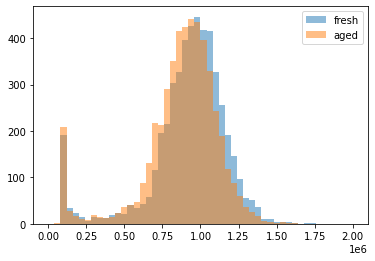

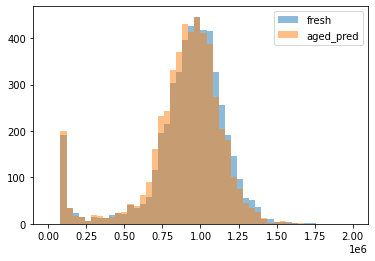

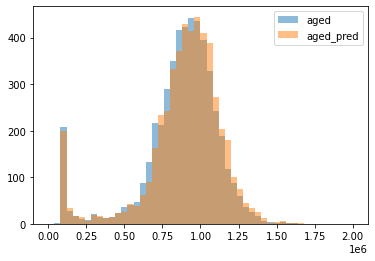

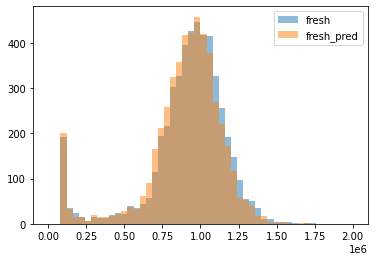

In [32]:

bins=50
ran=[0,2e6]

plt.hist(df_events_pred.Esum, bins=50, range=ran, alpha=0.5, label='fresh')
plt.hist(df_events_pred.Esum_aged, bins=50, range=ran, alpha=0.5, label='aged')

plt.legend()

plt.show()



plt.hist(df_events_pred.Esum, bins=50, range=ran, alpha=0.5, label='fresh')
plt.hist(df_events_pred.Esum_aged_pred, bins=50, range=ran, alpha=0.5, label='aged_pred')

plt.legend()

plt.show()

 

plt.hist(df_events_pred.Esum_aged, bins=50, range=ran, alpha=0.5, label='aged')
plt.hist(df_events_pred.Esum_aged_pred, bins=50, range=ran, alpha=0.5, label='aged_pred')


plt.legend()

plt.show()


plt.hist(df_events_pred.Esum, bins=50, range=ran, alpha=0.5, label='fresh')
plt.hist(df_events_pred.Esum_new_pred, bins=50, range=ran, alpha=0.5, label='fresh_pred')


plt.legend()

plt.show()

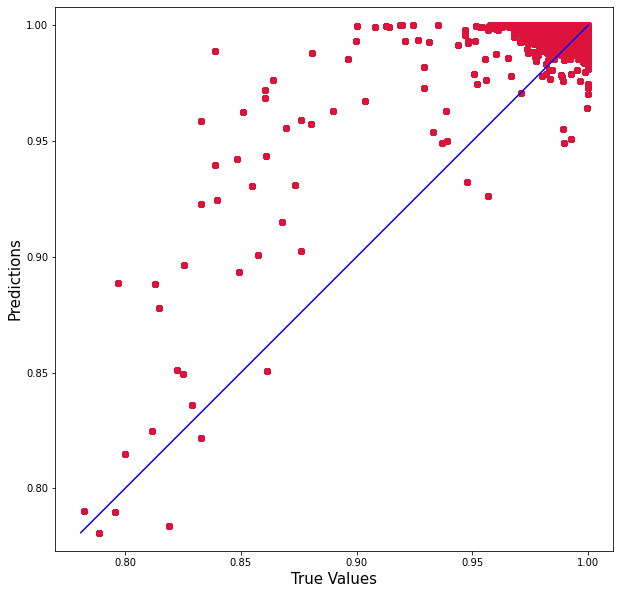

In [33]:

true_value = results_caloGAN_df.aging_factor.values
predicted_value = results_caloGAN_df.pred_aging_factor.values
plt.figure(figsize=(10,10))
plt.scatter(true_value, predicted_value, c='crimson' , alpha=0.5)
# plt.yscale('log')
# plt.xscale('log')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [34]:
wasserstein_distance(df_events_pred.Esum_aged_pred, df_events_pred.Esum_aged), wasserstein_distance(df_events_pred.Esum_new_pred, df_events_pred.Esum)


(21535.526471964666, 22299.475322755956)

In [35]:
wasserstein_distance(df_old_events.Esum_aged, df_new_events.Esum_aged), wasserstein_distance(df_old_events.Esum, df_new_events.Esum)


(4373.4345029888245, 4856.954373597502)

In [36]:
wasserstein_distance(df_events_pred.Esum_aged_pred, df_events_pred.Esum_aged), wasserstein_distance(df_events_pred.Esum_new_pred, df_events_pred.Esum)


(21535.526471964666, 22299.475322755956)